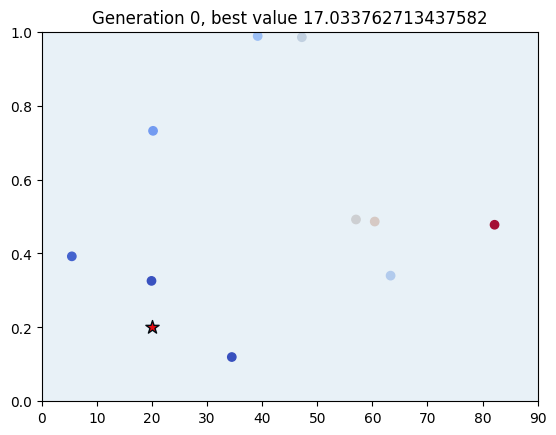

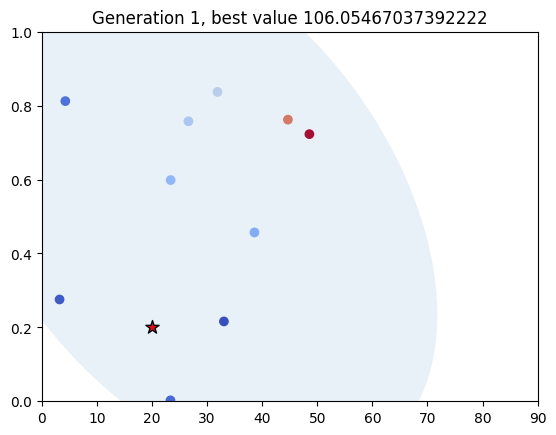

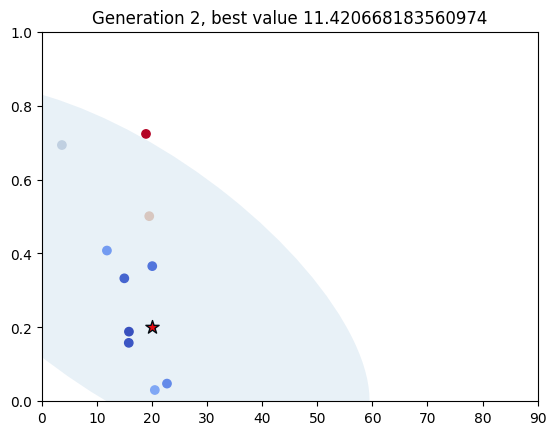

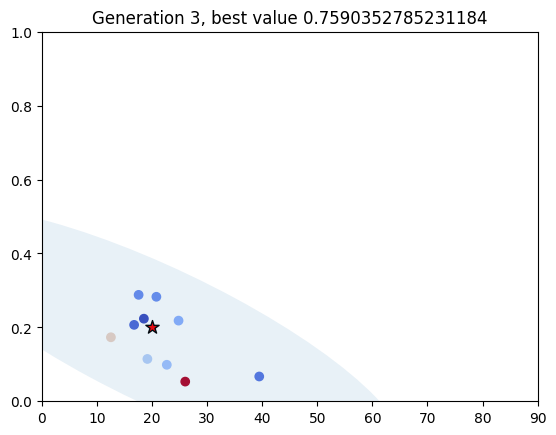

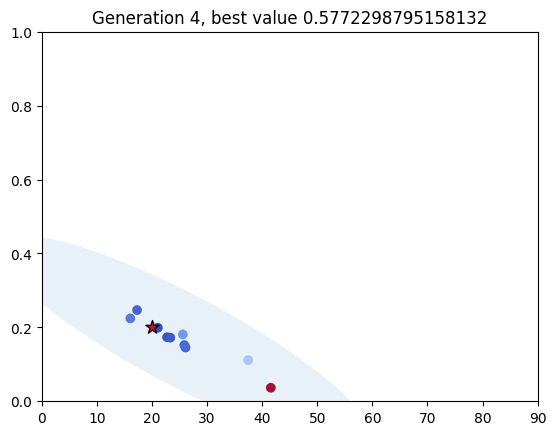

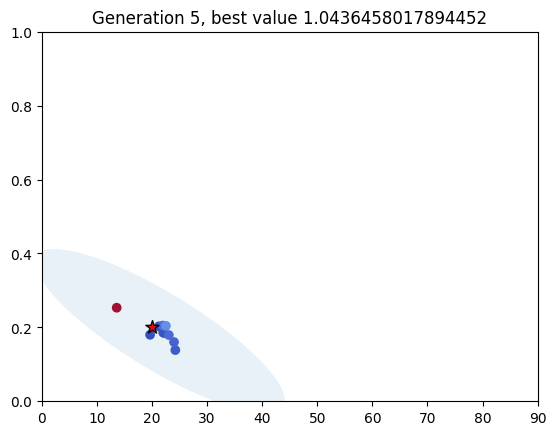

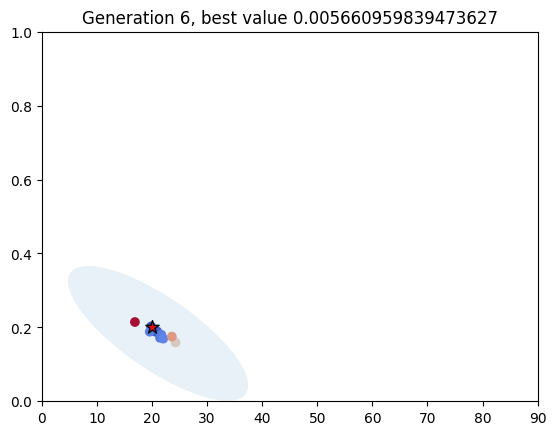

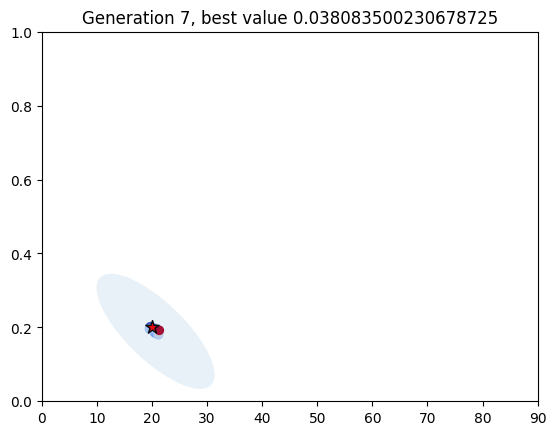

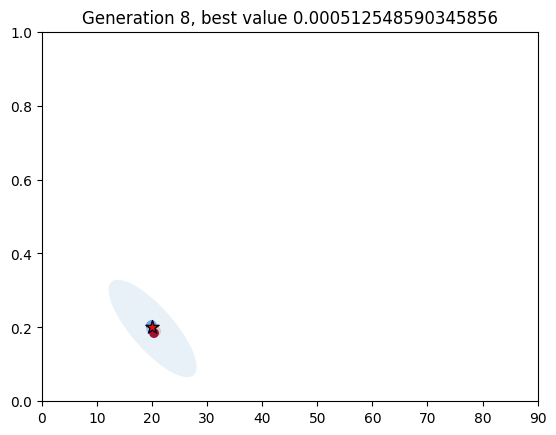

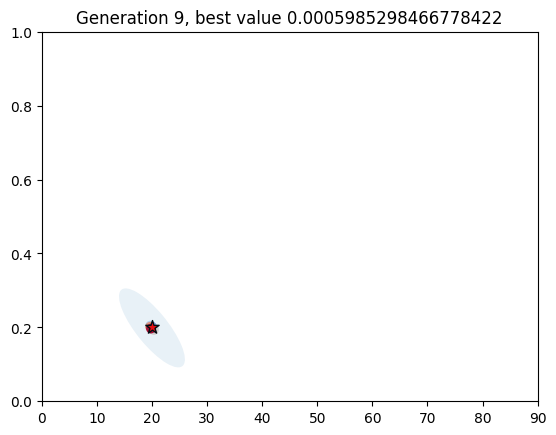

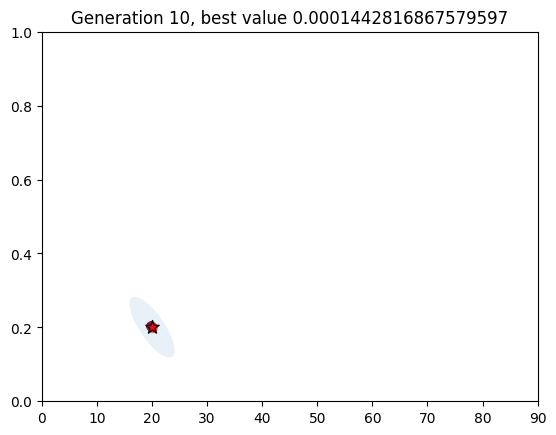

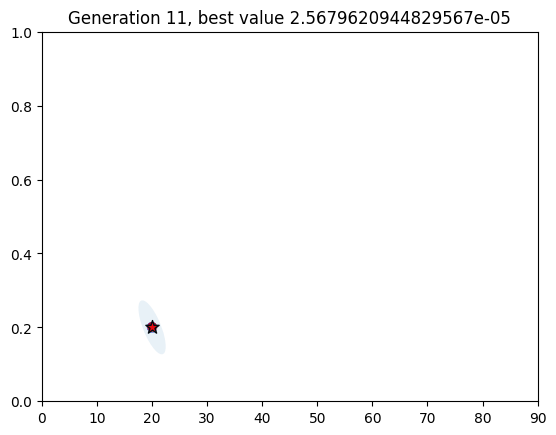

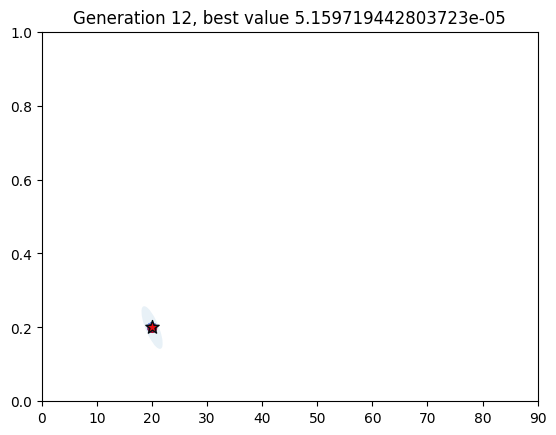

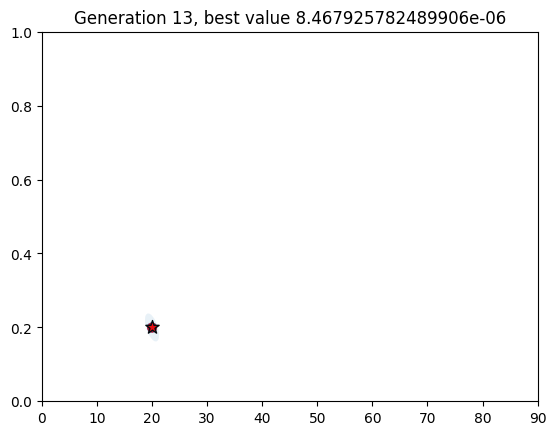

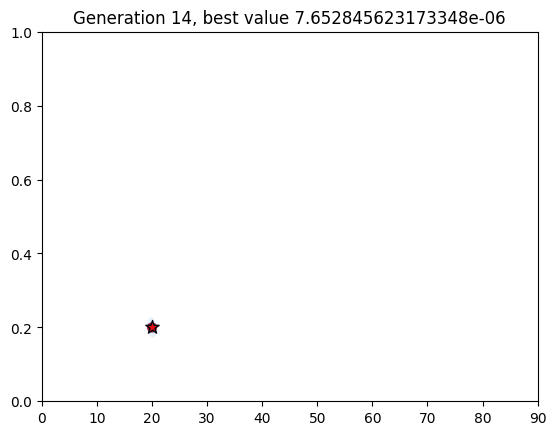

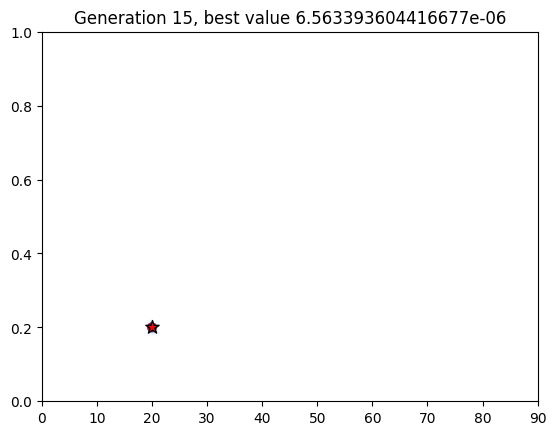

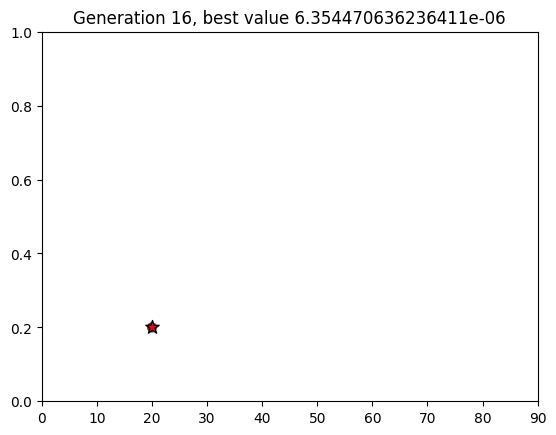

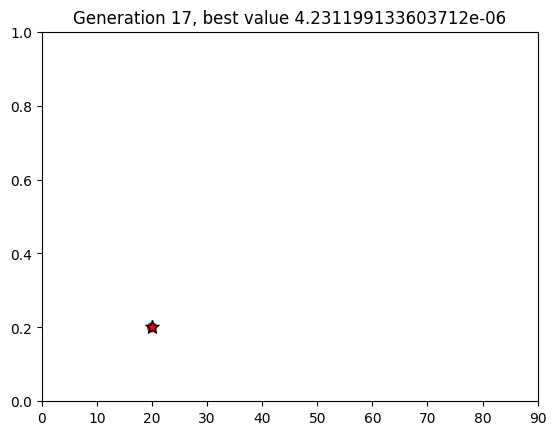

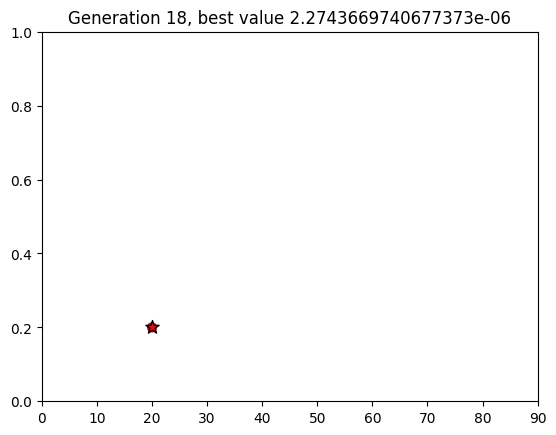

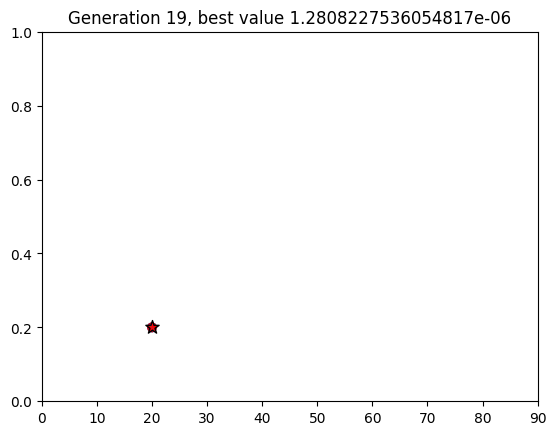

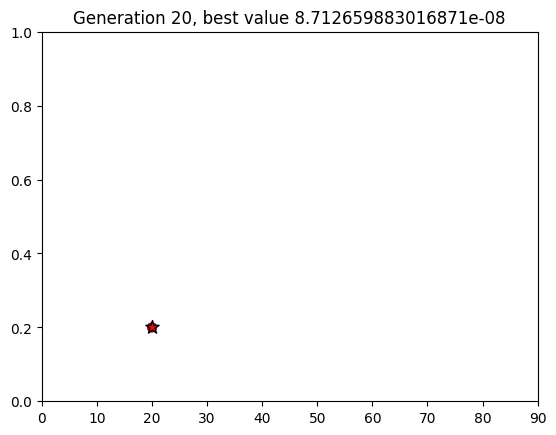

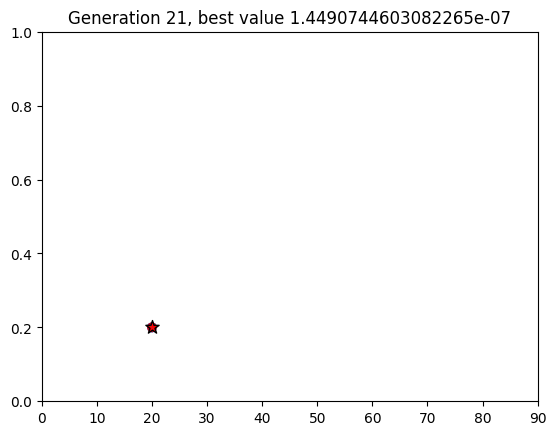

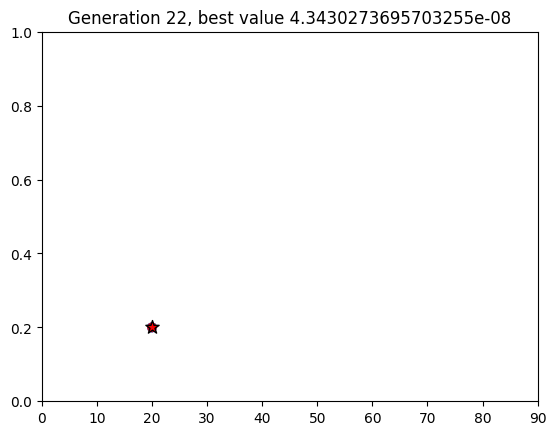

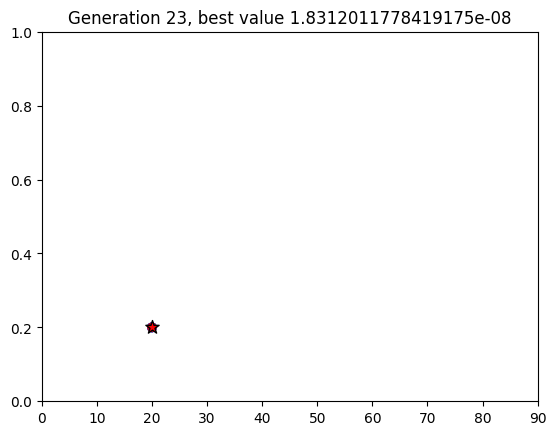

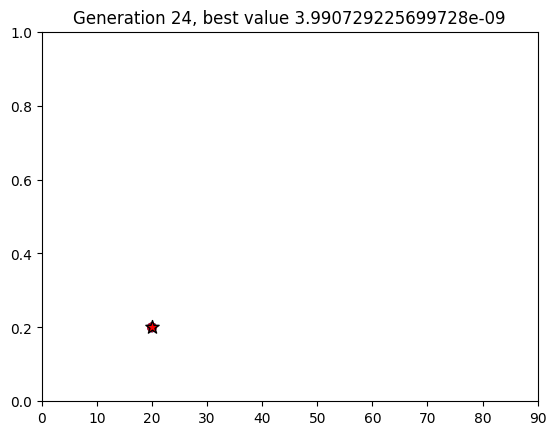

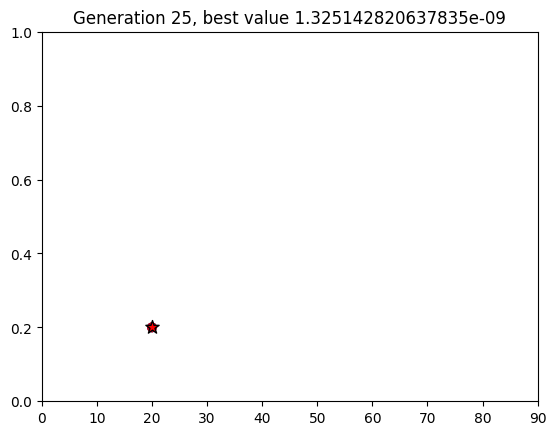

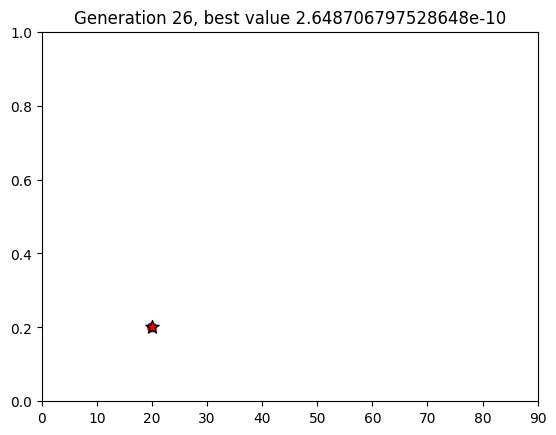

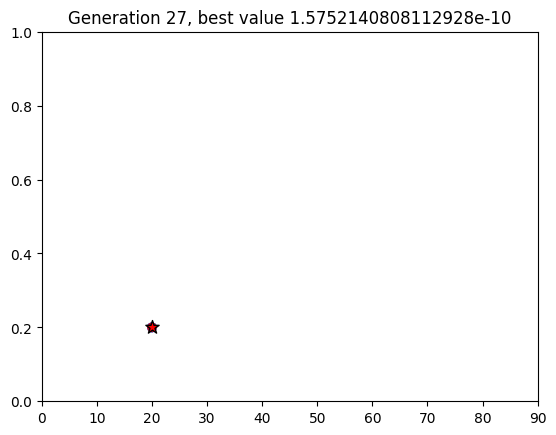

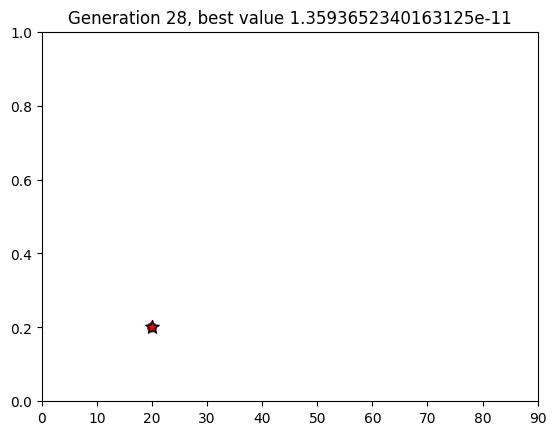

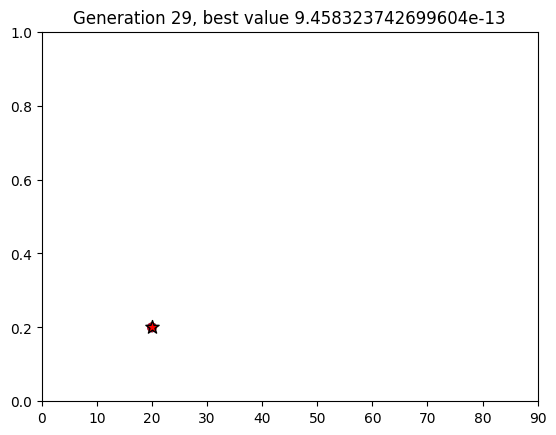

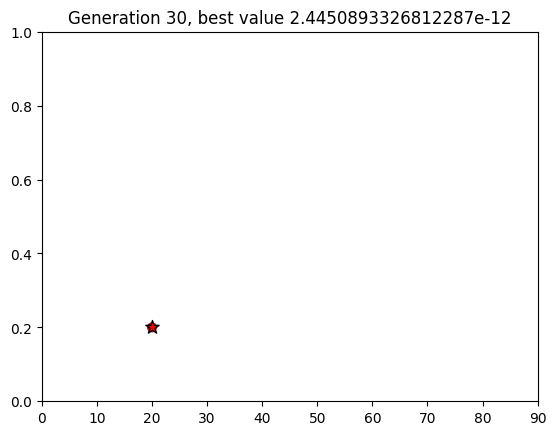

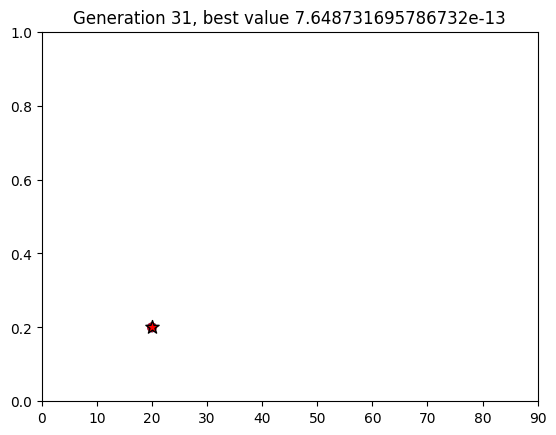

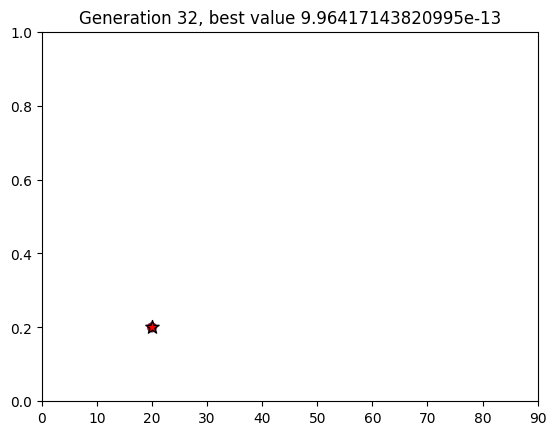

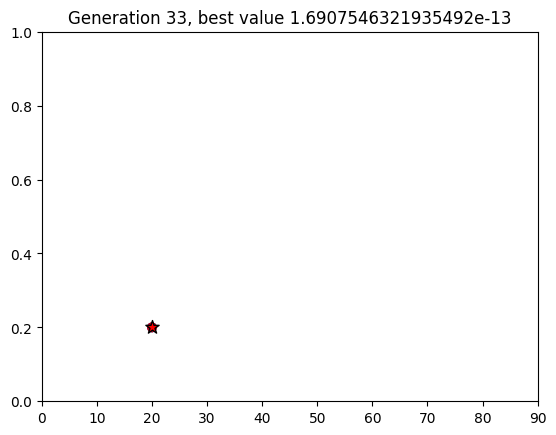

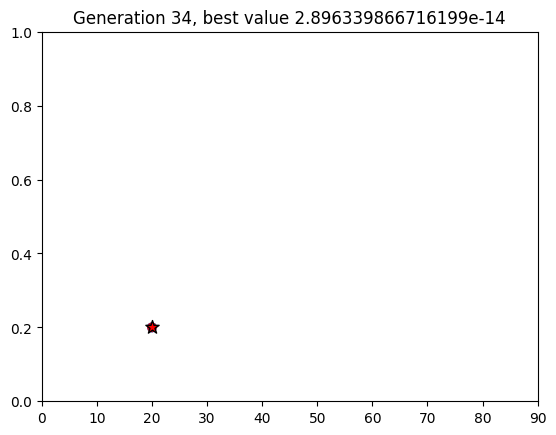

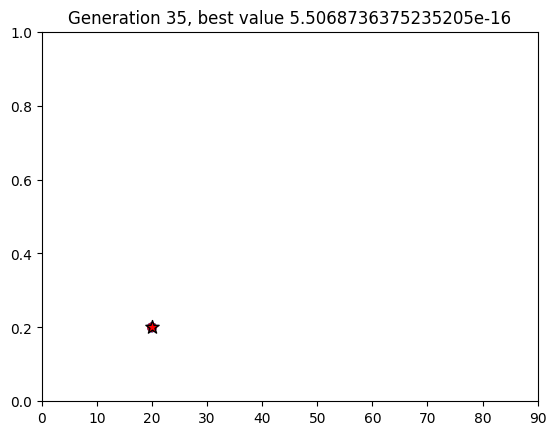

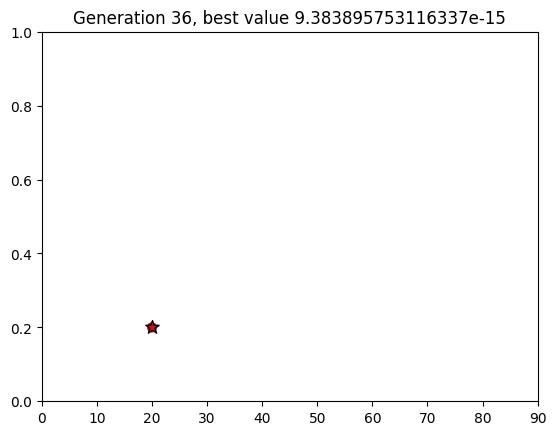

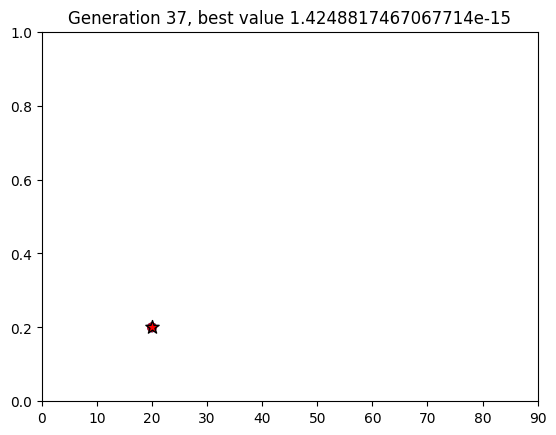

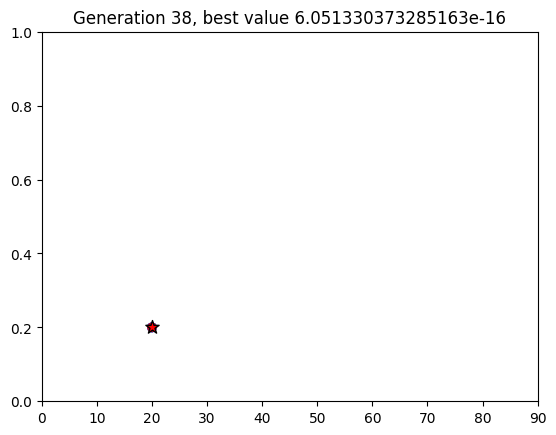

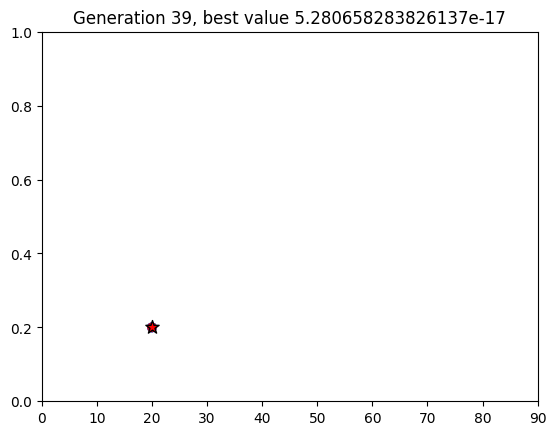

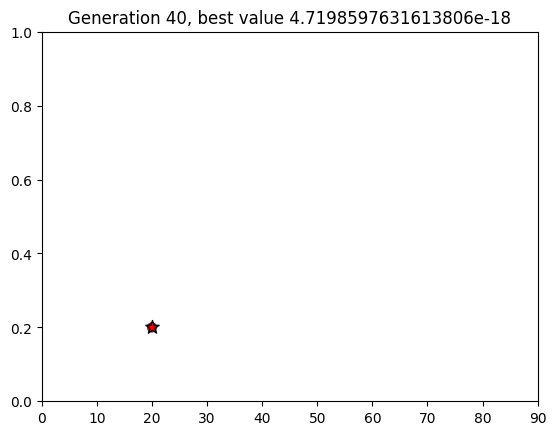

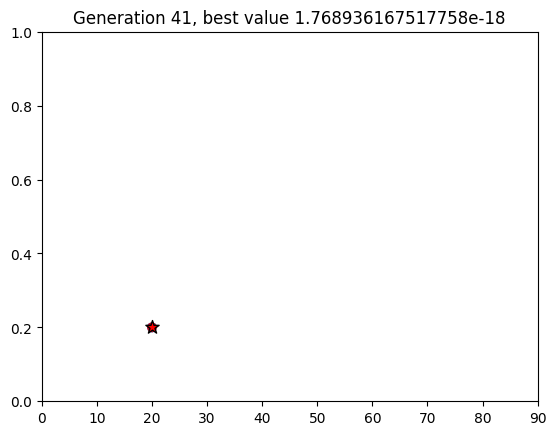

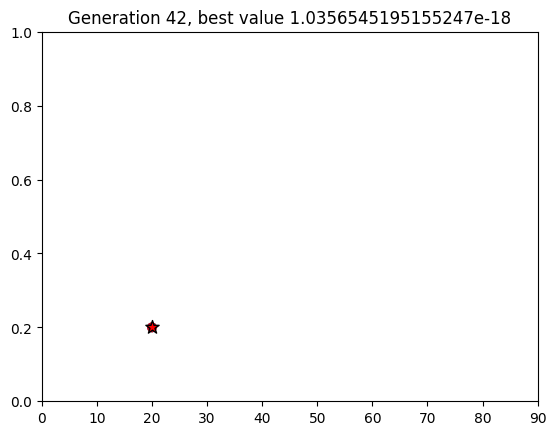

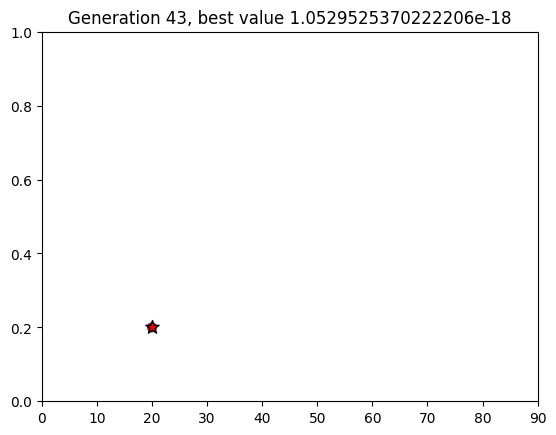

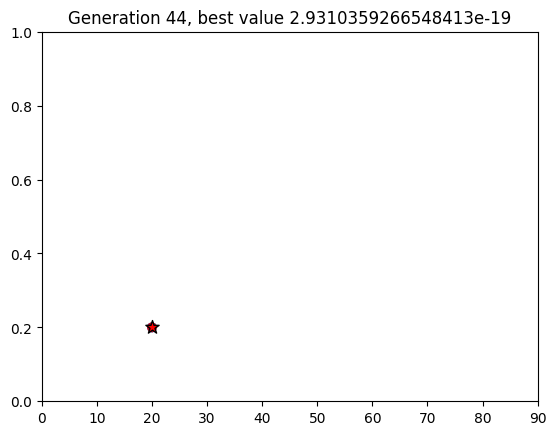

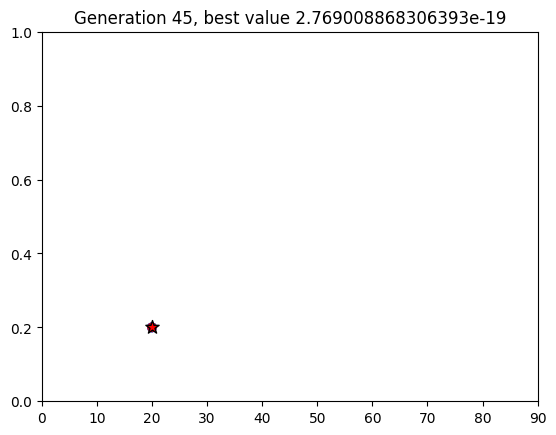

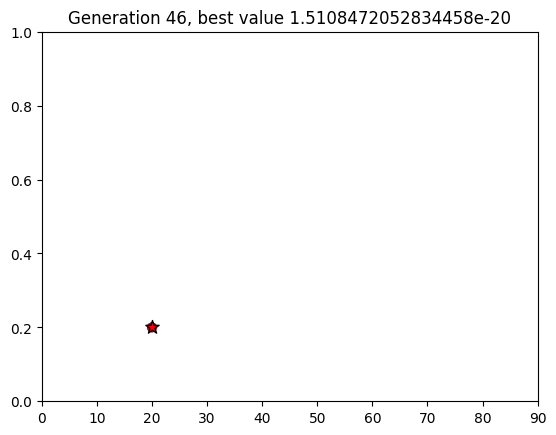

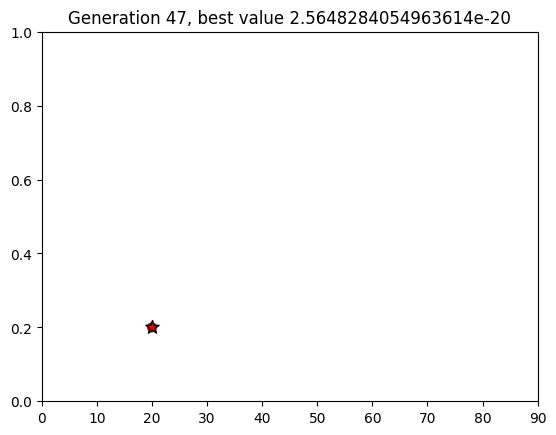

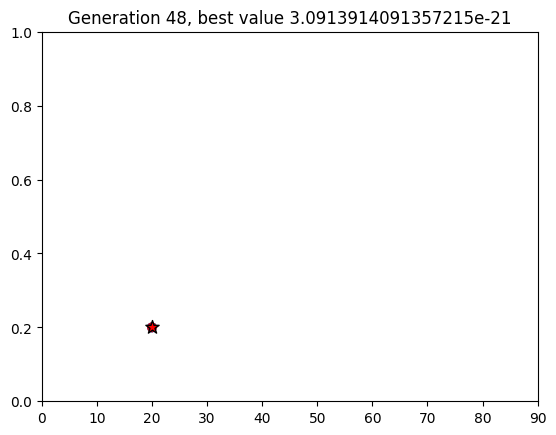

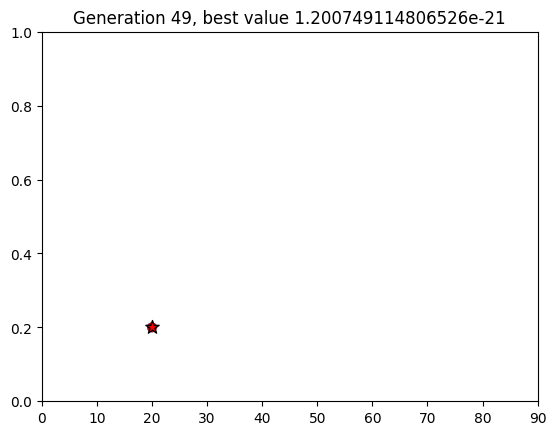

In [217]:
from cmaes import CMA
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

goal = (20,1)


def quadratic(x1, x2, plot=False):
    x = np.arange(100)
    ist = 90*x1*np.sin(5*x2*x*np.pi/180)
    soll = goal[0]*np.sin(goal[1]*x*np.pi/180)
    if plot:
        plt.plot(ist, label='ist')
        plt.plot(soll, label='soll')
        plt.legend()
        plt.show()
    return np.square(soll-ist).mean()

optimizer = CMA(mean=np.array([0.5,0.5]),sigma=1, population_size=10, bounds=np.array([[0,1], [0,1]]))



for generation in range(50):
    #print(optimizer._C, '\n')

    solutions = []
    best_idx = 0
    best_value = np.inf
    for i in range(optimizer.population_size):
        x = optimizer.ask()
        value = quadratic(x[0], x[1])
        if value < best_value:
            best_value = value
            best_idx = i

        solutions.append((x, value))
        #print(f"#{generation} {value} (x1={x[0]}, x2 = {x[1]})")
    optimizer.tell(solutions)


#--------------- Visualization --------------------------------------------------------
    x =[]
    y = []
    c = []
    for solution in solutions:
        x.append(solution[0][0])#*90)
        y.append(solution[0][1])#*5)
        c.append(solution[1])

    fig, ax = plt.subplots()
    ax.scatter(x,y,c=c, cmap='coolwarm', alpha=1)
    ax.scatter(goal[0]/90,goal[1]/5,marker='*',color='r', s=100, edgecolors='black')
    ax.set_title(f"Generation {generation}, best value {best_value}")

    x_mean, y_mean = optimizer._mean
    #x_mean = x_mean*90
    #y_mean = y_mean*5

    n_std = 1

    cov = optimizer._C

    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, alpha = 0.1)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
    ax.set_xlim((0,1))
    ax.set_ylim((0,1))
    ax.set_xticks(np.linspace(0,1,10), [0,10,20,30,40,50,60,70,80,90])
    plt.show()
    optimizer.tell(solutions)


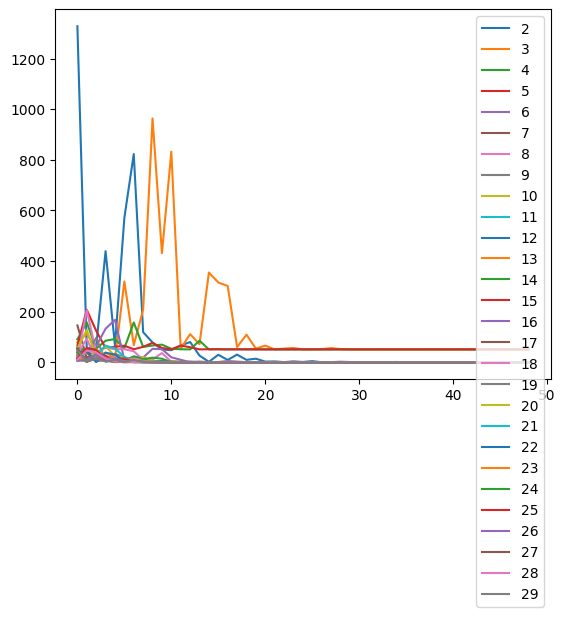

In [57]:
from cmaes import CMA
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
def quadratic(x1, x2, plot=False):
    x = np.arange(100)
    ist = 90*x1*np.sin(5*x2*x*np.pi/180)
    soll = 10*np.sin(4.7*x*np.pi/180)
    if plot:
        plt.plot(ist, label='ist')
        plt.plot(soll, label='soll')
        plt.legend()
        plt.show()
    return np.square(soll-ist).mean()

time_score = dict()
for n_pop in range(2,30):

    optimizer = CMA(mean=np.array([0.5,0.5]),sigma=1, population_size=n_pop, bounds=np.array([[0,1], [0,1]]))
    time_score[n_pop] = []
    for generation in range(1,50):

        solutions = []
        best_idx = 0
        best_value = np.inf
        for i in range(optimizer.population_size):
            x = optimizer.ask()
            value = quadratic(x[0], x[1])
            if value < best_value:
                best_value = value
                best_idx = i

            solutions.append((x, value))
            #print(f"#{generation} {value} (x1={x[0]}, x2 = {x[1]})")
        optimizer.tell(solutions)

        time_score[n_pop].append(best_value)

for key in time_score:
    plt.plot(time_score[key], label = key)

plt.legend()
#plt.ylim((0,250))
#plt.xlim((0,30))
plt.show()

In [ ]:
    # Ellipse calculation
    cov = optimizer._C
    eig = np.linalg.eig(cov)

    width = eig[0][0]

    sigma_x = optimizer._C[0][0]
    sigma_y = optimizer._C[1][1]
    corr = optimizer._C[0][1]

    width = np.sqrt(sigma_y**2 + sigma_x**2)*90
    angle = np.arctan(sigma_y*5/sigma_x*90) if corr >= 0 else np.arctan(-sigma_y*5/sigma_x*90)
    angle = angle*180/np.pi - 90
    height = np.abs(corr*10)*5

    cov = optimizer._C
    eig = np.linalg.eig(cov)
    v = eig[1]*eig[0]
    v_n = np.dot(np.array([[90,0],[0,5]]),v)
    width = np.linalg.norm(v_n[:,0])*100
    height = np.linalg.norm(v_n[:,1])*100
    angle = np.arctan(v_n[1][0]/v_n[0][0])*180/np.pi

In [197]:
np.cos(3.14)

-0.9999987317275396